In [3]:
import plotly.express as px 
import pandas as pd 
import numpy as np 
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')
import datetime
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings("ignore") # Don't want to see the warnings in the notebook
from sklearn import svm

import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

from __future__ import absolute_import,division,print_function,unicode_literals

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime

import pandas as pd


mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['axes.grid'] = False

import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

from statsmodels.tsa import stattools
from statsmodels.tsa import seasonal

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

print("Import Succesfull")

Import Succesfull


In [4]:
# Get some data
df = pd.read_excel("/content/drive/My Drive/Capstone_Commodity_SureshaHP/Potato/MumbaiPotato_04Sep.xlsx",index_col=0)

In [5]:
df.head()

,Date,MUMBAI_RetailPrice,MUMBAI_Volume,DieselPrice
0,2015-01-01,2000.0,31379.0,53.74
1,2015-02-01,1855.0,32856.0,51.96
2,2015-03-01,1982.0,31267.0,55.41
3,2015-04-01,1052.0,30272.0,52.56
4,2015-05-01,1313.0,27165.0,58.19


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67 entries, 0 to 66
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                67 non-null     datetime64[ns]
 1   MUMBAI_RetailPrice  67 non-null     float64       
 2   MUMBAI_Volume       67 non-null     float64       
 3   DieselPrice         67 non-null     float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 2.6 KB


#  Prediction Models

# 1. Auto ARIMA
# ARIMA Autoregressive integrated moving average its a kind of Grid Search start_p = is the Autoregressieve Part, start_d = is the integrated mart \n, start_i = is the movng avaerage part

adf stands for Augmented Dickey-Fuller unit root test. It is used to check whther the data is stationary or not.

In [7]:
pip install pmdarima

In [8]:
datetime_series = pd.to_datetime(df['Date'])

# create datetime index passing the datetime series
datetime_index = pd.DatetimeIndex(datetime_series.values)

df2=df.set_index(datetime_index)

# we don't need the column anymore
df2.drop('Date',axis=1,inplace=True)

print(df2.index)

DatetimeIndex(['2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01',
               '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
               '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01',
               '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
               '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01',
               '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
      

In [9]:
pip install pyramid-arima

     |████████████████████████████████| 604kB 9.7MB/s 


In [10]:
from pmdarima.arima import auto_arima

In [11]:
import statsmodels.api as sm
import pyramid as pm

In [12]:
columns = ['MUMBAI_RetailPrice']
df2 = df2[columns]
df2.head()

,MUMBAI_RetailPrice
2015-01-01,2000.0
2015-02-01,1855.0
2015-03-01,1982.0
2015-04-01,1052.0
2015-05-01,1313.0


In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose
ss_decomposition = seasonal_decompose(df2, 
                                      model='additive', 
                                      freq=6)
estimated_trend = ss_decomposition.trend
estimated_seasonal = ss_decomposition.seasonal
estimated_residual = ss_decomposition.resid

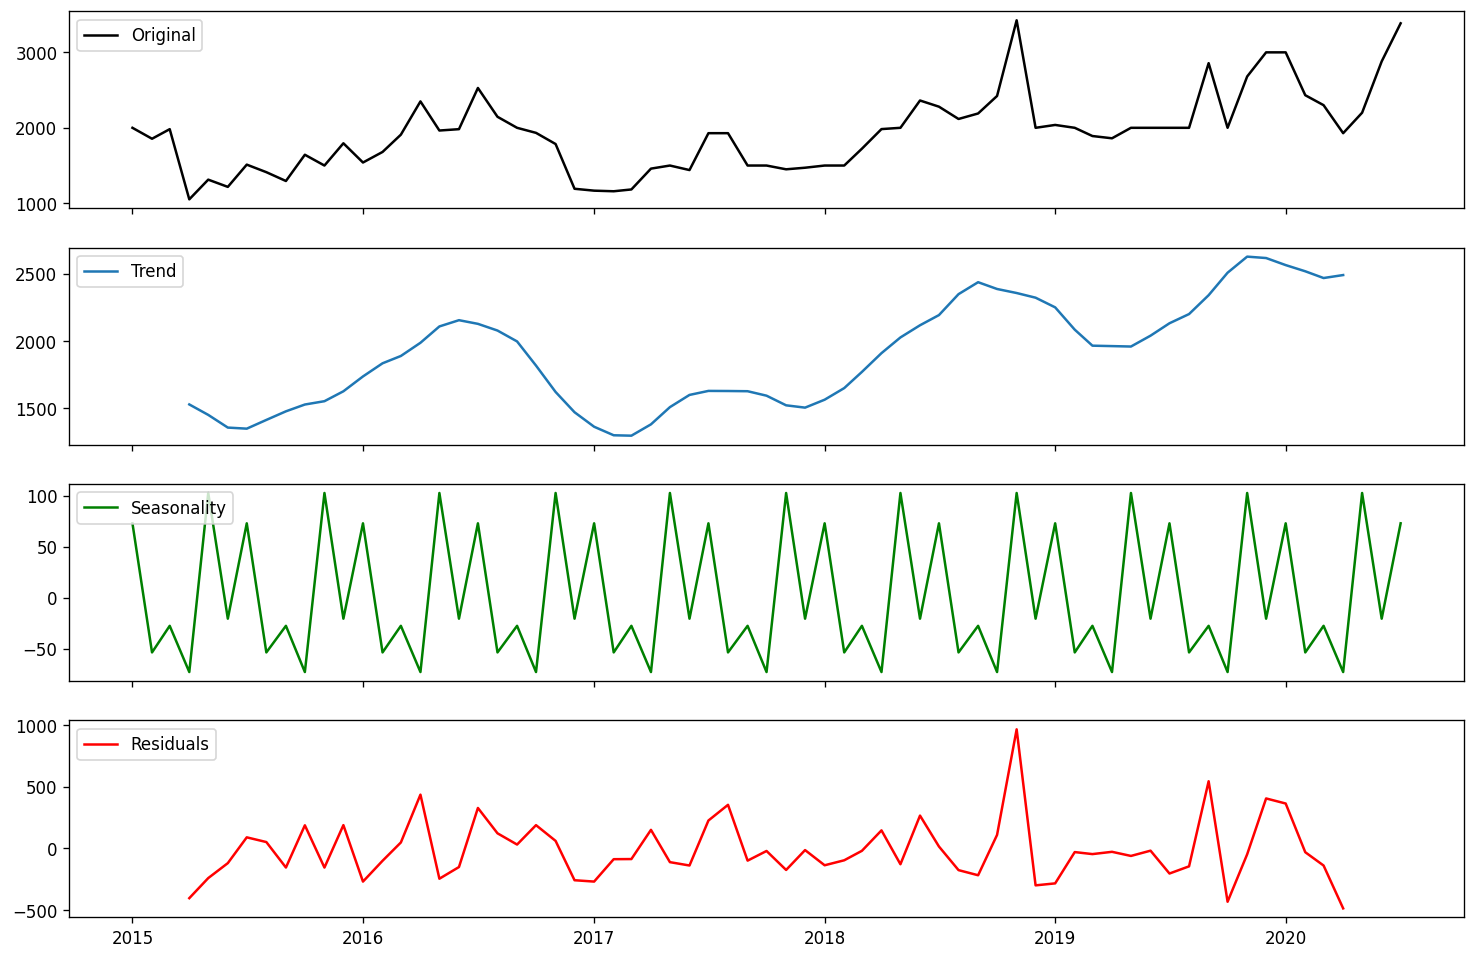

In [14]:
fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
fig.set_figheight(10)
fig.set_figwidth(15)

axes[0].plot(df2, 'k', label='Original')
axes[0].legend(loc='upper left');

axes[1].plot(estimated_trend, label='Trend')
axes[1].legend(loc='upper left');

axes[2].plot(estimated_seasonal, 'g', label='Seasonality')
axes[2].legend(loc='upper left');

axes[3].plot(estimated_residual, 'r', label='Residuals')
axes[3].legend(loc='upper left')

In [15]:
#divide into train and validation set
train = df2[:int(0.75*(len(df2)))]
test = df2[int(0.75*(len(df2))):]

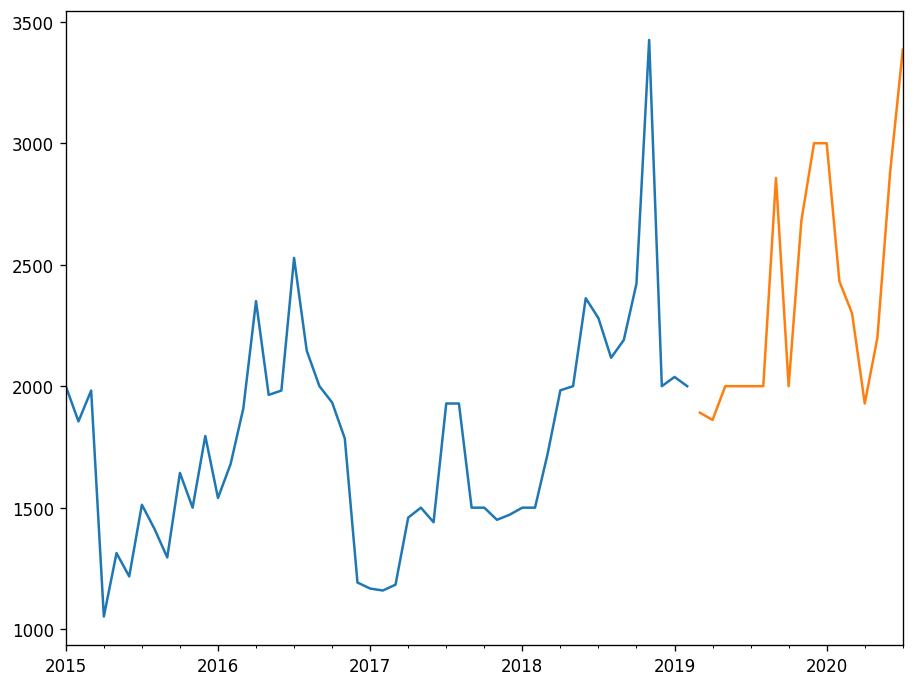

In [17]:
#plotting the data
train['MUMBAI_RetailPrice'].plot()
test['MUMBAI_RetailPrice'].plot()

In [18]:
# Fit auto_arima function to AirPassengers dataset 
stepwise_fit = auto_arima(df2['MUMBAI_RetailPrice'], start_p = 1, start_q = 1, 
                          max_p = 3, max_q = 3, m = 12, 
                          start_P = 0, seasonal = True, 
                          d = None, D = 1, trace = True, 
                          error_action ='ignore',   # we don't want to know if an order does not work 
                          suppress_warnings = True,  # we don't want convergence warnings 
                          stepwise = True)           # set to stepwise 
  
# To print the summary 
stepwise_fit.summary() 

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.93 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=866.232, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=833.945, Time=0.59 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.74 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=870.869, Time=0.01 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=844.125, Time=0.13 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=835.228, Time=1.52 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.94 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=inf, Time=0.68 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=2.24 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=855.941, Time=0.43 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=835.945, Time=0.73 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=836.020, Time=0.41 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=840.568, Time=0.48 sec
 ARIMA(2,0,1)(1,1,0)[12] intercept   : AIC=837.939, T

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   67
Model:             SARIMAX(1, 0, 0)x(1, 1, 0, 12)   Log Likelihood                -412.972
Date:                            Sun, 13 Sep 2020   AIC                            833.945
Time:                                    06:20:09   BIC                            841.974
Sample:                                         0   HQIC                           837.050
                                             - 67                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    136.2593     89.174      1.528      0.127     -38.519     311.037
ar.L1          0.6279      0.124      5.051      0.000       0.384       0.872
ar.S.L12      -0.5230      0.140     -3.736      0.000      -0.797      -0.249
sigma2      1.774e+05    3.3e+04      5.384      0.000    1.13e+05    2.42e+05
===================================================================================
Ljung-Box (Q):                       29.33   Jarque-Bera (JB):                 7.99
Prob(Q):                              0.89   Prob(JB):                         0.02
Heteroskedasticity (H):               0.91   Skew:                             0.79
Prob(H) (two-sided):                  0.84   Kurtosis:                         4.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [20]:
# Fit a SARIMAX(0, 1, 1)x(2, 1, 1, 12) on the training set 
from statsmodels.tsa.statespace.sarimax import SARIMAX 
  
model = SARIMAX(train['MUMBAI_RetailPrice'],  
                order = (0, 1, 0),  
                seasonal_order =(1, 1, 0, 12)) 
  
result = model.fit() 
result.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                 MUMBAI_RetailPrice   No. Observations:                   50
Model:             SARIMAX(0, 1, 0)x(1, 1, 0, 12)   Log Likelihood                -276.631
Date:                            Sun, 13 Sep 2020   AIC                            557.263
Time:                                    06:21:02   BIC                            560.484
Sample:                                01-01-2015   HQIC                           558.398
                                     - 02-01-2019                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.6149      0.117     -5.272      0.000      -0.844      -0.386
sigma2      1.661e+05   3.18e+04      5.230      0.000    1.04e+05    2.28e+05
===================================================================================
Ljung-Box (Q):                       55.94   Jarque-Bera (JB):                 5.50
Prob(Q):                              0.02   Prob(JB):                         0.06
Heteroskedasticity (H):               1.52   Skew:                             0.16
Prob(H) (two-sided):                  0.48   Kurtosis:                         4.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

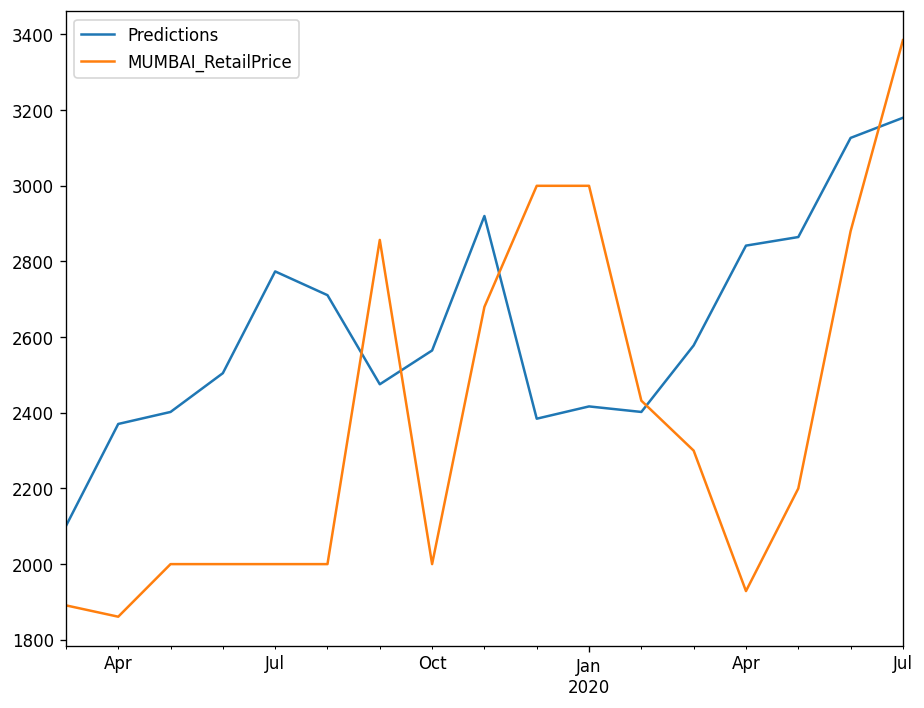

In [22]:
start = len(train) 
end = len(train) + len(test) - 1
  
# Predictions for one-year against the test set 
predictions = result.predict(start, end, 
                             typ = 'levels').rename("Predictions") 
  
# plot predictions and actual values 
predictions.plot(legend = True) 
test['MUMBAI_RetailPrice'].plot(legend = True) 

In [23]:
# Load specific evaluation tools 
from sklearn.metrics import mean_squared_error 
from statsmodels.tools.eval_measures import rmse 
  
# Calculate root mean squared error 
rmse(test["MUMBAI_RetailPrice"], predictions)

515.7527946422535

In [24]:
# Calculate mean squared error 
mean_squared_error(test["MUMBAI_RetailPrice"], predictions) 

266000.9451812945

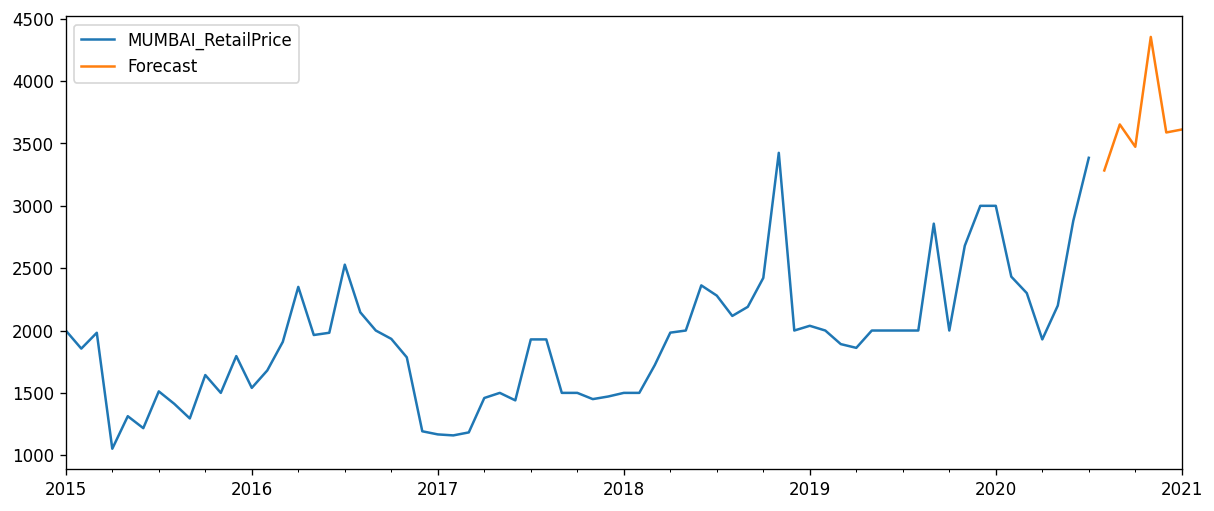

In [26]:
# Train the model on the full dataset 
model = model = SARIMAX(df2['MUMBAI_RetailPrice'],  
                        order = (0, 1, 0),  
                        seasonal_order =(1, 1, 0, 12)) 
result = model.fit() 
  
# Forecast for the next 6 months
forecast = result.predict(start = len(df2),  
                          end = (len(df2)-1) + 1 * 6,  
                          typ = 'levels').rename('Forecast') 
  
# Plot the forecast values 
df2['MUMBAI_RetailPrice'].plot(figsize = (12, 5), legend = True) 
forecast.plot(legend = True) 

In [27]:
# forecast for 6 months
forecast.round(1)

2020-08-01    3283.5
2020-09-01    3652.5
2020-10-01    3473.4
2020-11-01    4354.4
2020-12-01    3588.3
2021-01-01    3611.9
Freq: MS, Name: Forecast, dtype: float64

# 2. VAR - Vector auto regression model

In [28]:
from statsmodels.tsa.api import VAR

In [29]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

In [30]:
datetime_series = pd.to_datetime(df['Date'])

# create datetime index passing the datetime series
datetime_index = pd.DatetimeIndex(datetime_series.values)

df3=df.set_index(datetime_index)

# we don't need the column anymore
df3.drop('Date',axis=1,inplace=True)

print(df3.index)

DatetimeIndex(['2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01',
               '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
               '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01',
               '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
               '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01',
               '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
      

In [31]:
col = ['MUMBAI_RetailPrice','MUMBAI_Volume','DieselPrice']
df3 = df3[col]
df3.head()

,MUMBAI_RetailPrice,MUMBAI_Volume,DieselPrice
2015-01-01,2000.0,31379.0,53.74
2015-02-01,1855.0,32856.0,51.96
2015-03-01,1982.0,31267.0,55.41
2015-04-01,1052.0,30272.0,52.56
2015-05-01,1313.0,27165.0,58.19


In [32]:
#divide into train and validation set
train1 = df3[:int(0.75*(len(df)))]
test1 = df3[int(0.75*(len(df))):]
print(train1.shape)
print(test1.shape)

(50, 3)
(17, 3)


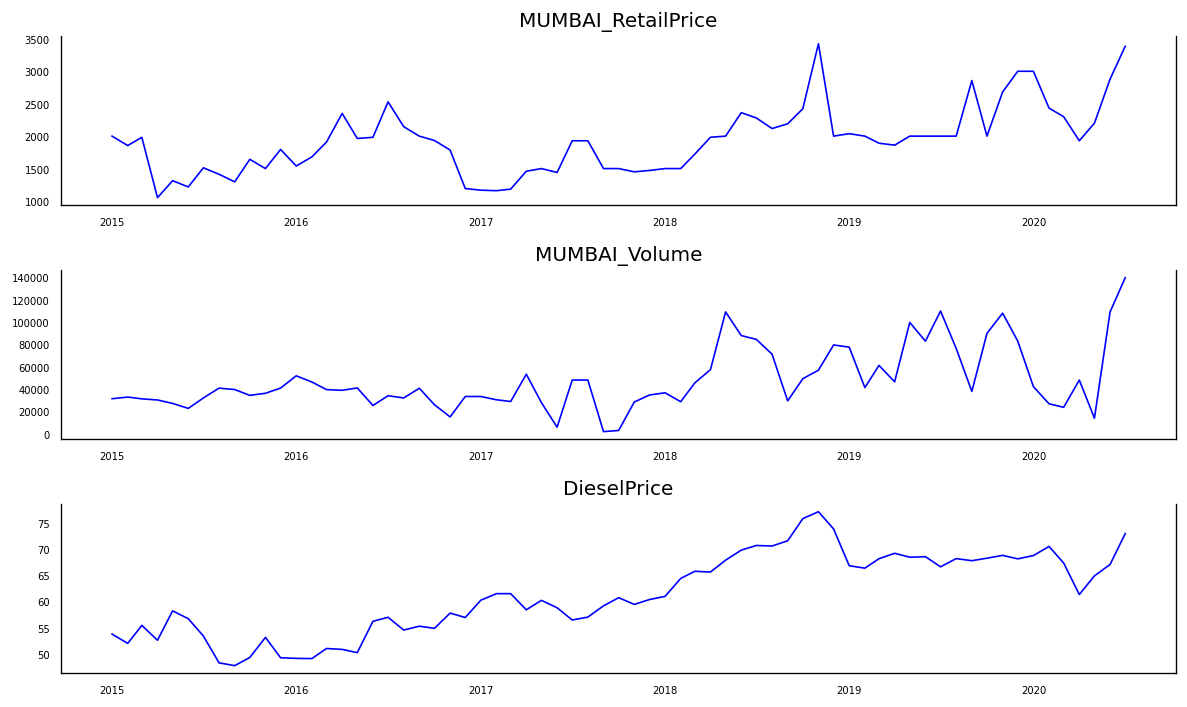

In [33]:
# Plot
fig, axes = plt.subplots(nrows=3, ncols=1, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = df3[df3.columns[i]]
    ax.plot(data, color='blue', linewidth=1)
    # Decorations
    ax.set_title(df3.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

# Testing Causation using Granger’s Causality Test

In [34]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(df3, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(df3[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(df3, variables = df3.columns)   

,MUMBAI_RetailPrice_x,MUMBAI_Volume_x,DieselPrice_x
MUMBAI_RetailPrice_y,1.0000,0.0001,0.0499
MUMBAI_Volume_y,0.0081,1.0000,0.0008
DieselPrice_y,0.1412,0.0234,1.0000


# Cointegration Test
Cointegration test helps to establish the presence of a statistically significant connection between two or more time series.

In [35]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df3, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df3,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df3.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(df3)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
MUMBAI_RetailPrice ::  22.83     > 24.2761   =>   False
MUMBAI_Volume ::  4.35      > 12.3212   =>   False
DieselPrice ::  1.2       > 4.1296    =>   False


# Check for Stationarity and Make the Time Series Stationary in VAR

# There is a suite of tests called unit-root tests. The popular ones are:

1.Augmented Dickey-Fuller Test (ADF Test)
2.KPSS test
3.Philip-Perron test

In [36]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")    

In [37]:
# ADF Test on each column
for name, column in train1.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "MUMBAI_RetailPrice" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -3.1307
 No. Lags Chosen       = 0
 Critical value 1%     = -3.571
 Critical value 5%     = -2.923
 Critical value 10%    = -2.599
 => P-Value = 0.0244. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "MUMBAI_Volume" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -3.303
 No. Lags Chosen       = 0
 Critical value 1%     = -3.571
 Critical value 5%     = -2.923
 Critical value 10%    = -2.599
 => P-Value = 0.0147. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "DieselPrice" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Station

In [38]:
# 1st difference
df_differenced = train1.diff().dropna()

# Second Differencing
df_differenced = df_differenced.diff().dropna()

In [39]:
# ADF Test on each column
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "MUMBAI_RetailPrice" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -7.6056
 No. Lags Chosen       = 2
 Critical value 1%     = -3.585
 Critical value 5%     = -2.928
 Critical value 10%    = -2.602
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "MUMBAI_Volume" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -5.8797
 No. Lags Chosen       = 5
 Critical value 1%     = -3.597
 Critical value 5%     = -2.933
 Critical value 10%    = -2.605
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "DieselPrice" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.


# All Data is stationary after 1 differencing 

In [40]:
# How to Select the Order (P) of VAR model

modelVAR = VAR(df_differenced)
for i in [1,2,3,4,5,6,7,8,9,10,11]:
    result = modelVAR.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  35.05703242212409
BIC :  35.529410533199
FPE :  1681177230459741.5
HQIC:  35.2347914786371 

Lag Order = 2
AIC :  34.59183493351248
BIC :  35.42664948408359
FPE :  1062055161488026.0
HQIC:  34.90456146757485 

Lag Order = 3
AIC :  34.3296773579219
BIC :  35.53411901776878
FPE :  829877649670512.9
HQIC:  34.778681115656454 

Lag Order = 4
AIC :  34.43214049280503
BIC :  36.01358130468713
FPE :  949166559927371.4
HQIC:  35.01861498460619 

Lag Order = 5
AIC :  34.50639962754936
BIC :  36.47239045437008
FPE :  1083467804073984.1
HQIC:  35.23139628506868 

Lag Order = 6
AIC :  34.441586653894596
BIC :  36.799852564422025
FPE :  1121495978815748.8
HQIC:  35.30598438098049 

Lag Order = 7
AIC :  34.419007758902445
BIC :  37.17744084188986
FPE :  1292794831086164.2
HQIC:  35.42347700206413 

Lag Order = 8
AIC :  34.15576781646419
BIC :  37.322416792927825
FPE :  1304738487448777.0
HQIC:  35.30072809507633 

Lag Order = 9
AIC :  34.41320212279559
BIC :  37.9962579759979
FP

# alternate method to choose the order(p) of the VAR models is to use the model.select_order(maxlags) method

In [41]:
x = modelVAR.select_order(maxlags=11)
x.summary()

,AIC,BIC,FPE,HQIC
0,35.63,35.76,2.974e+15,35.67
1,35.16,35.68,1.857e+15,35.34
2,34.66,35.57,1.145e+15,34.98
3,34.46,35.76,9.585e+14*,34.92
4,34.62,36.32,1.192e+15,35.22
5,34.80,36.89,1.559e+15,35.54
6,34.57,37.05,1.419e+15,35.44
7,34.75,37.62,2.113e+15,35.76
8,34.44,37.70,2.161e+15,35.59
9,34.54,38.19,4.004e+15,35.82


# The selected order(p) 11 is the order that gives the lowest ‘AIC’, ‘BIC’, ‘FPE’ and ‘HQIC’ scores.

# Train the VAR Model of Selected Order(p)

In [42]:
model_fitted = modelVAR.fit(11)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 13, Sep, 2020
Time:                     06:23:13
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    34.9616
Nobs:                     37.0000    HQIC:                   32.0863
Log likelihood:          -620.135    FPE:                9.61381e+14
AIC:                      30.5207    Det(Omega_mle):     1.36059e+14
--------------------------------------------------------------------
Results for equation MUMBAI_RetailPrice
                            coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------------
const                         44.417125        80.420532            0.552           0.581
L1.MUMBAI_RetailPrice         -0.647554         1.339209           -0.484           0.629
L1.MUMBAI_V

# Check for Serial Correlation of Residuals (Errors) using Durbin Watson Statistic

In [43]:
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

for col, val in zip(df3.columns, out):
    print((col), ':', round(val, 2))

MUMBAI_RetailPrice : 1.4
MUMBAI_Volume : 0.6
DieselPrice : 1.11


In [44]:
# forecast
n_obs =12
X_train,X_test = df3[0:-n_obs],df3[-n_obs:]

In [45]:
print(X_train.shape)
print(X_test.shape)

(55, 3)
(12, 3)


In [46]:
X_train_log = np.log(X_train)
X_train_log_diff =(X_train_log).diff().dropna()
X_train_log_diff.describe()

,MUMBAI_RetailPrice,MUMBAI_Volume,DieselPrice
count,54.000000,54.000000,54.000000
mean,0.000000,0.023195,0.003979
std,0.179526,0.731482,0.043454
min,-0.633413,-3.210168,-0.101268
25%,-0.069950,-0.167164,-0.019815
50%,0.000000,-0.007715,0.005652
75%,0.097272,0.271587,0.027644
max,0.346508,2.255873,0.112745


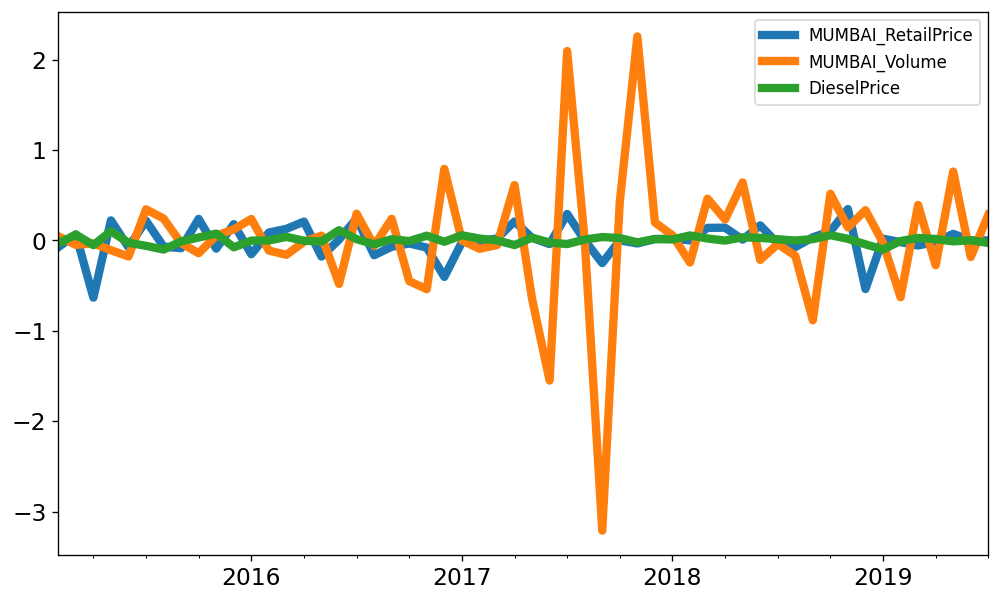

In [47]:
X_train_log_diff.plot(figsize=(10,6),linewidth=5,fontsize=14)
plt.show()

# auto correleation function analysis of transformed series

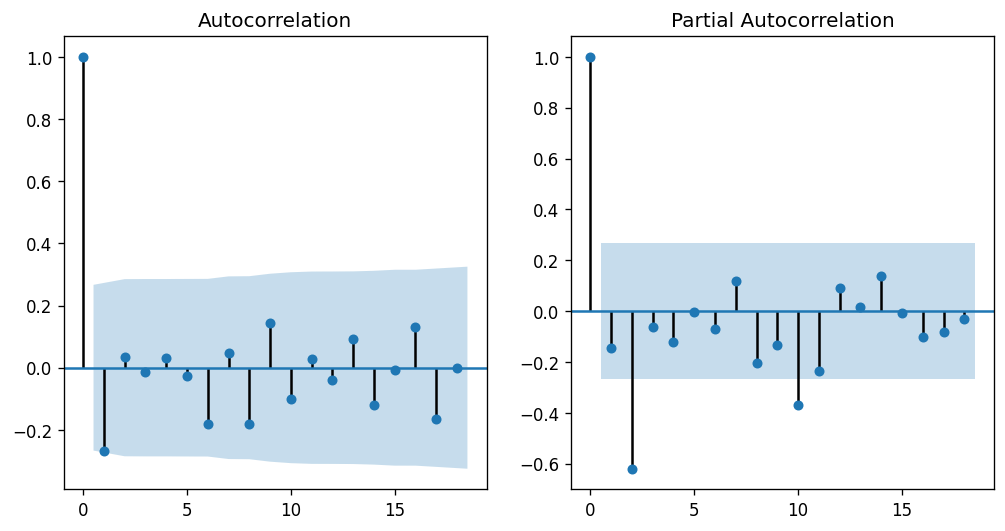

In [49]:
fig, ax = plt.subplots(1,2, figsize=(10,5)) 
ax[0] = plot_acf(X_train_log_diff['MUMBAI_RetailPrice'], ax=ax[0])
ax[1] = plot_pacf(X_train_log_diff['MUMBAI_Volume'], ax=ax[1])

In [50]:
mod = VAR(X_train)
res = mod.fit(maxlags=6, ic='aic')
print(res.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 13, Sep, 2020
Time:                     06:23:47
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    33.4755
Nobs:                     54.0000    HQIC:                   33.2039
Log likelihood:          -1109.77    FPE:                2.22134e+14
AIC:                      33.0335    Det(Omega_mle):     1.79272e+14
--------------------------------------------------------------------
Results for equation MUMBAI_RetailPrice
                           coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------------
const                       263.445611       360.362395            0.731           0.465
L1.MUMBAI_RetailPrice         0.542467         0.119969            4.522           0.000
L1.MUMBAI_Volum

In [51]:
# Get the lag order
lag_order = res.k_ar
print(lag_order)
# Input data for forecasting
input_data = X_train.values[-lag_order:]
print(input_data)
# forecasting
pred = res.forecast(y=input_data, steps=n_obs)
pred = (pd.DataFrame(pred, index=X_test.index, columns=X_test.columns + '_pred'))
print(pred.round())

1
[[2.000e+03 1.098e+05 6.662e+01]]
            MUMBAI_RetailPrice_pred  MUMBAI_Volume_pred  DieselPrice_pred
2019-08-01                   2112.0             85674.0              67.0
2019-09-01                   2119.0             74130.0              67.0
2019-10-01                   2098.0             68388.0              67.0
2019-11-01                   2072.0             65393.0              67.0
2019-12-01                   2051.0             63743.0              67.0
2020-01-01                   2036.0             62775.0              67.0
2020-02-01                   2024.0             62167.0              67.0
2020-03-01                   2016.0             61757.0              67.0
2020-04-01                   2011.0             61460.0              67.0
2020-05-01                   2006.0             61230.0              67.0
2020-06-01                   2003.0             61042.0              67.0
2020-07-01                   2000.0             60881.0              67.0


In [52]:
# Calculate root mean squared error 
rmse(X_test, pred).round(2) 

array([6.918000e+02, 3.881007e+04, 2.830000e+00])

# RMSE for MUMBAI Retail price is 692, delhi Volume is 3881 and for Diesel Price is 2.8